In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import math
from sklearn.preprocessing import LabelEncoder

In [36]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [37]:
df.purpose.values

array(['debt_consolidation', 'credit_card', 'debt_consolidation', ...,
       'debt_consolidation', 'home_improvement', 'debt_consolidation'],
      dtype=object)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [40]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [41]:
# Convert 'credit.policy' column to boolean type
df['credit.policy'] = df['credit.policy'].astype(bool)

# Convert 'not.fully.paid' column to boolean type
df['not.fully.paid'] = df['not.fully.paid'].astype(bool)

# Display the first few rows of the DataFrame to verify the changes
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,True,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False
1,True,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,False
2,True,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False
3,True,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False
4,True,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,False


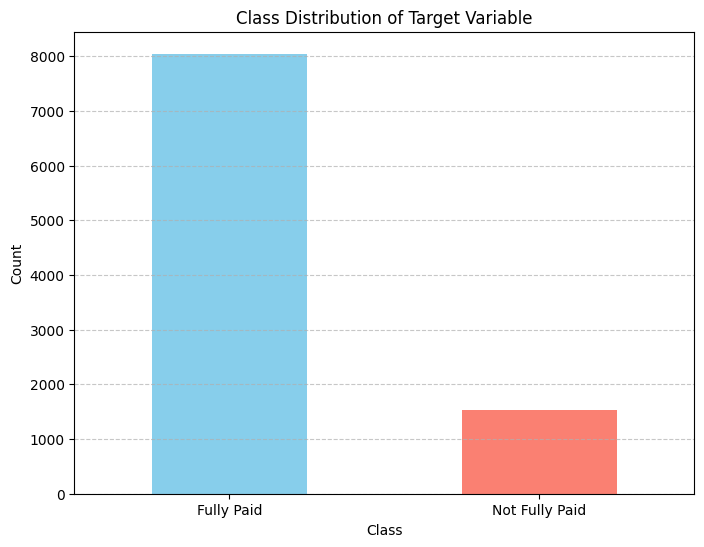

In [42]:
# Class distribution of the target variable
class_distribution = df['not.fully.paid'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fully Paid', 'Not Fully Paid'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

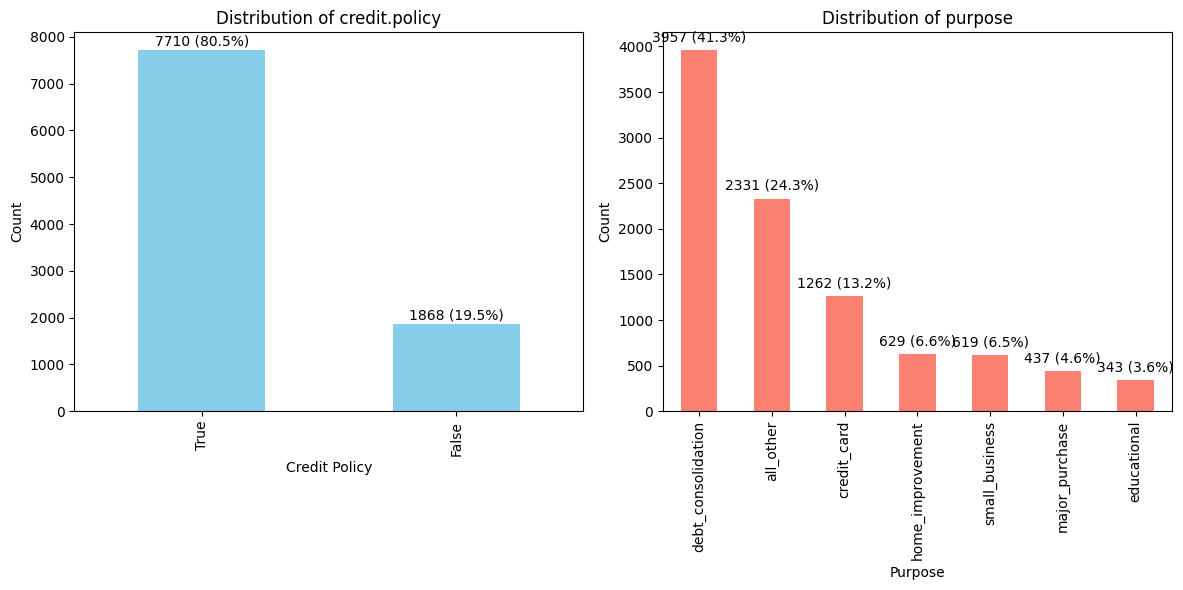

In [43]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot bar chart for distribution of 'credit.policy'
plt.subplot(1, 2, 1)
df['credit.policy'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of credit.policy')
plt.xlabel('Credit Policy')
plt.ylabel('Count')

# Add percentage labels on top of each bar
total_credit_policy = len(df['credit.policy'])
for i, count in enumerate(df['credit.policy'].value_counts()):
    plt.text(i, count + total_credit_policy * 0.01, f'{count} ({count / total_credit_policy:.1%})', ha='center')

# Plot bar chart for distribution of 'purpose'
plt.subplot(1, 2, 2)
df['purpose'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')

# Add percentage labels on top of each bar
total_purpose = len(df['purpose'])
for i, count in enumerate(df['purpose'].value_counts()):
    plt.text(i, count + total_purpose * 0.01, f'{count} ({count / total_purpose:.1%})', ha='center')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [44]:
# Features of interest
features_of_interest = ['inq.last.6mths', 'delinq.2yrs', 'pub.rec']

# Dictionary to store unique values and their percentages
unique_values_with_percentage = {}

# Calculate unique values and their percentages for each feature
for feature in features_of_interest:
    # Calculate unique values and their counts
    unique_values_count = df[feature].value_counts().sort_index()
    # Calculate percentages for each value
    percentages = (unique_values_count / df.shape[0]) * 100
    # Store unique values and their percentages in the dictionary
    unique_values_with_percentage[feature] = {'unique_values': unique_values_count.index.tolist(),
                                              'percentages': percentages.tolist()}

# Print the sorted unique values and their percentages for each feature
for feature, values_percentage in unique_values_with_percentage.items():
    print(f"Feature: {feature}")
    print("Unique Values: ", values_percentage['unique_values'])
    print("Percentages: ", values_percentage['percentages'])
    print()

Feature: inq.last.6mths
Unique Values:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 25, 27, 28, 31, 32, 33]
Percentages:  [37.97243683441219, 25.70474002923366, 14.449780747546463, 9.020672374190854, 4.959281687199833, 2.902484861140113, 1.7226978492378369, 1.044059302568386, 0.7517226978492378, 0.49070787220714135, 0.24013363959072875, 0.15660889538525788, 0.15660889538525788, 0.06264355815410315, 0.06264355815410315, 0.09396533723115473, 0.031321779077051574, 0.02088118605136772, 0.04176237210273544, 0.02088118605136772, 0.01044059302568386, 0.02088118605136772, 0.01044059302568386, 0.01044059302568386, 0.01044059302568386, 0.01044059302568386, 0.01044059302568386, 0.01044059302568386]

Feature: delinq.2yrs
Unique Values:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 13]
Percentages:  [88.30653581123407, 8.68657339736897, 2.0045938609313008, 0.6786385466694509, 0.1983712674879933, 0.06264355815410315, 0.02088118605136772, 0.01044059302568386, 0.01044059302568386

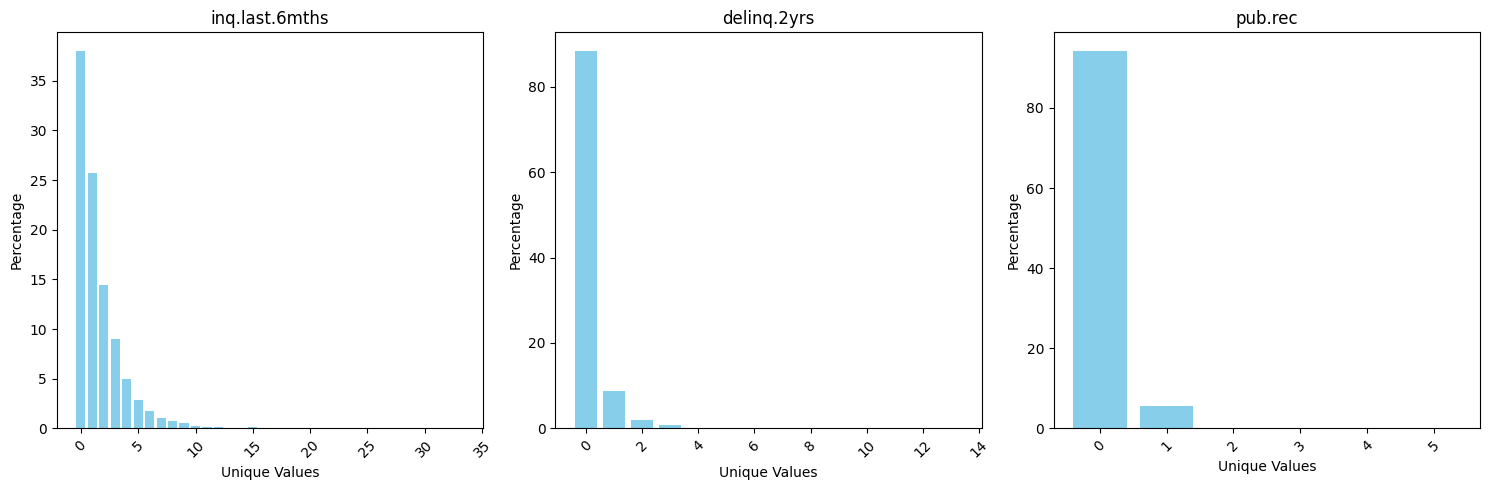

In [45]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Iterate over each feature
for i, (feature, values_percentage) in enumerate(unique_values_with_percentage.items(), start=1):
    # Create subplot
    plt.subplot(1, len(features_of_interest), i)
    
    # Plot bar chart
    plt.bar(values_percentage['unique_values'], values_percentage['percentages'], color='skyblue')
    
    # Set title and labels
    plt.title(feature)
    plt.xlabel('Unique Values')
    plt.ylabel('Percentage')
    
    # Rotate x-axis labels if too crowded
    if len(values_percentage['unique_values']) > 5:
        plt.xticks(rotation=45)
    
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

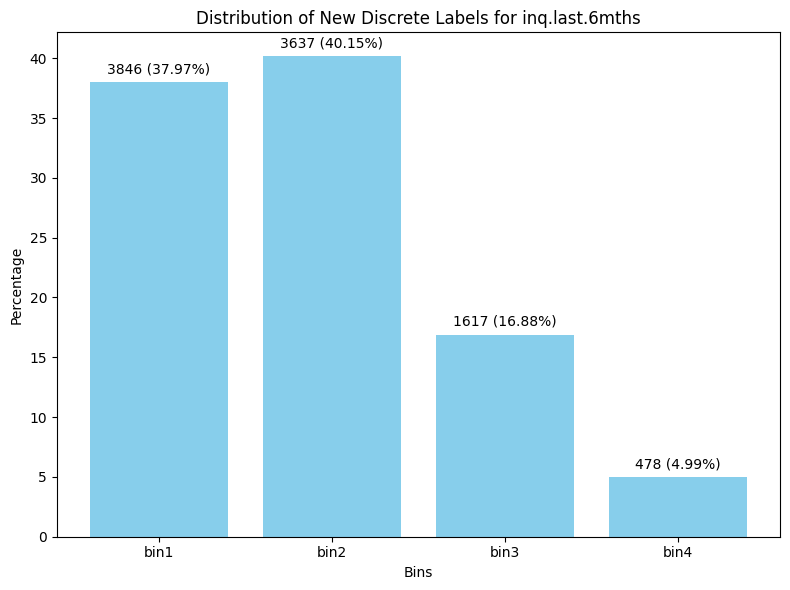

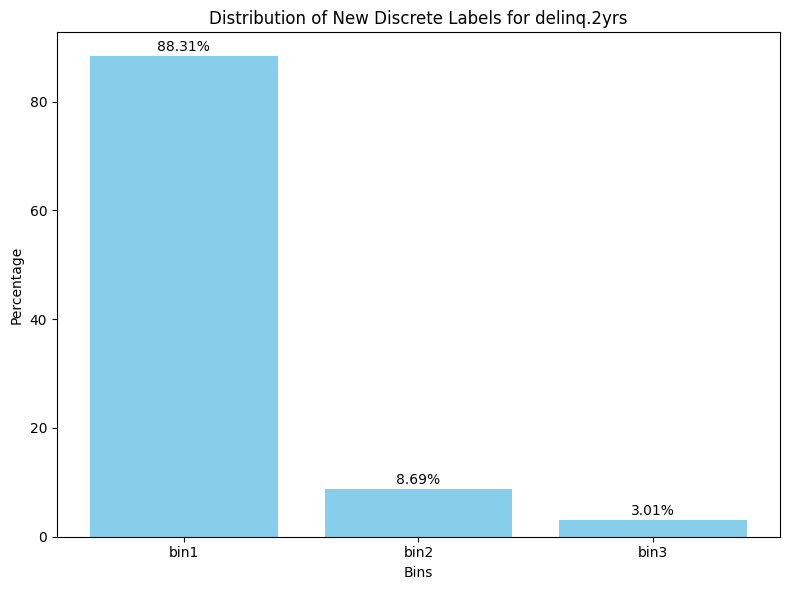

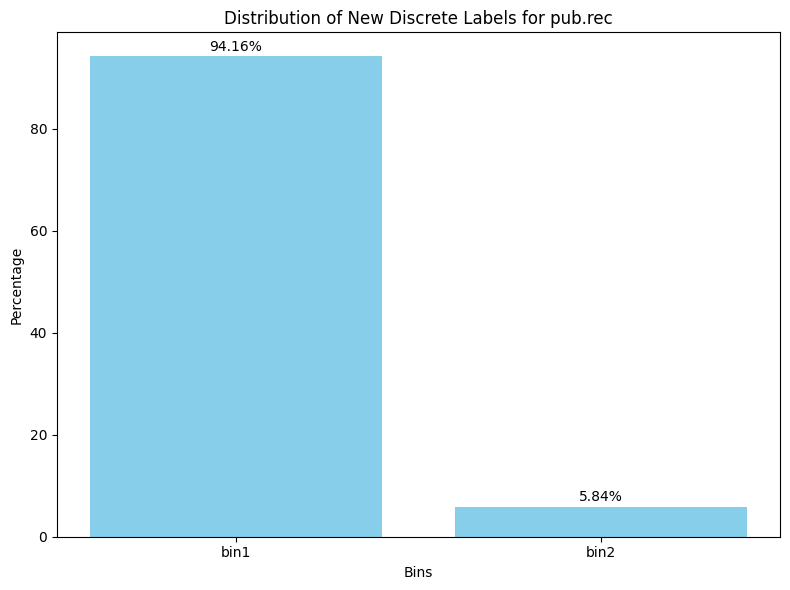

In [46]:

# Define custom binning function
def custom_binning(value):
    if value == 0:
        return 'bin1'
    elif value in [1, 2]:
        return 'bin2'
    elif value in [3, 4, 5]:
        return 'bin3'
    else:
        return 'bin4'

# Apply custom binning function to 'inq.last.6mths' feature
df['inq_bin'] = df['inq.last.6mths'].apply(custom_binning)

# Calculate distribution of new discrete labels
inq_bin_distribution = df['inq_bin'].value_counts(normalize=True) * 100

# Sort the bins by their names
inq_bin_distribution_sorted = inq_bin_distribution.sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(inq_bin_distribution_sorted.index, inq_bin_distribution_sorted.values, color='skyblue')

# Add counts and percentages as text on top of each bar
for bar, count, percentage in zip(bars, df['inq_bin'].value_counts(), inq_bin_distribution_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{count} ({percentage:.2f}%)",
             ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Distribution of New Discrete Labels for inq.last.6mths')
plt.xlabel('Bins')
plt.ylabel('Percentage')

# Show plot
plt.tight_layout()
plt.show()

# Define custom binning function for 'delinq.2yrs' feature
def custom_binning_delinq(value):
    if value == 0:
        return 'bin1'
    elif value == 1:
        return 'bin2'
    else:
        return 'bin3'

# Apply custom binning function to 'delinq.2yrs' feature
df['delinq_bin'] = df['delinq.2yrs'].apply(custom_binning_delinq)

# Calculate distribution of new discrete labels
delinq_bin_distribution = df['delinq_bin'].value_counts(normalize=True) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(delinq_bin_distribution.index, delinq_bin_distribution.values, color='skyblue')

# Add percentages as text on top of each bar
for bar, percentage in zip(bars, delinq_bin_distribution):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{percentage:.2f}%",
             ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Distribution of New Discrete Labels for delinq.2yrs')
plt.xlabel('Bins')
plt.ylabel('Percentage')

# Show plot
plt.tight_layout()
plt.show()

# Define custom binning function for 'pub.rec' feature
def custom_binning_pubrec(value):
    if value == 0:
        return 'bin1'
    else:
        return 'bin2'

# Apply custom binning function to 'pub.rec' feature
df['pubrec_bin'] = df['pub.rec'].apply(custom_binning_pubrec)

# Calculate distribution of new discrete labels
pubrec_bin_distribution = df['pubrec_bin'].value_counts(normalize=True) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(pubrec_bin_distribution.index, pubrec_bin_distribution.values, color='skyblue')

# Add percentages as text on top of each bar
for bar, percentage in zip(bars, pubrec_bin_distribution):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{percentage:.2f}%",
             ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Distribution of New Discrete Labels for pub.rec')
plt.xlabel('Bins')
plt.ylabel('Percentage')

# Show plot
plt.tight_layout()
plt.show()

In [47]:
# Filter records where 'revol.util' is greater than 100%
over_100_util_records = df[df['revol.util'] > 100]

# Add row numbers to the DataFrame after resetting the index
over_100_util_records.insert(0, 'Row Number', over_100_util_records.index + 1)

# Reset the index to remove the default index and avoid duplicates
over_100_util_records.reset_index(drop=True, inplace=True)

# Define a function to apply purple color to 'revol.util'
def highlight_revol_util(column):
    if column.name == 'revol.util':
        return ['background-color: purple'] * len(column)
    else:
        return [''] * len(column)

# Apply the styling to the DataFrame
styled_table = over_100_util_records.style.apply(highlight_revol_util)

styled_table

,Row Number,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,inq_bin,delinq_bin,pubrec_bin
0,7778,False,credit_card,0.143800,42.960000,9.210340,5.640000,632,660.000000,1269,105.700000,1,0,0,False,bin2,bin1,bin1
1,7896,False,debt_consolidation,0.143800,149.480000,9.852194,13.450000,642,1139.000000,2422,105.300000,3,0,0,False,bin3,bin1,bin1
2,7915,False,debt_consolidation,0.118600,23.210000,10.060491,11.330000,657,2879.958333,4479,101.800000,1,0,0,True,bin2,bin1,bin1
3,7923,False,credit_card,0.143800,359.950000,11.245046,9.980000,642,4679.958333,15918,101.400000,6,0,0,True,bin4,bin1,bin1
4,7924,False,all_other,0.093300,287.590000,9.615805,13.360000,717,3268.958333,2588,103.500000,0,0,0,True,bin1,bin1,bin1
5,7958,False,debt_consolidation,0.178600,88.410000,10.915088,9.620000,612,1230.000000,1190,119.000000,15,0,0,False,bin4,bin1,bin1
6,7983,False,credit_card,0.143800,137.450000,9.615805,16.320000,647,1049.000000,4364,101.500000,5,0,0,True,bin3,bin1,bin1
7,7992,False,all_other,0.099600,51.600000,9.798127,10.330000,682,2910.000000,6646,100.700000,1,0,0,True,bin2,bin1,bin1
8,8057,False,all_other,0.105900,78.110000,10.032408,5.700000,672,3150.041667,3613,103.200000,1,1,0,False,bin2,bin2,bin1
9,8074,False,educational,0.137500,495.520000,11.338572,19.100000,662,6660.041667,26710,102.700000,3,0,0,False,bin3,bin1,bin1


In [48]:
# Filter records where 'revol.util' is greater than 100%
over_100_util_records_index = df.index[df['revol.util'] > 100]

# Update the values to 100
df.loc[over_100_util_records_index, 'revol.util'] = 100

# Display the modified records
print(df.loc[over_100_util_records_index])

      credit.policy             purpose  int.rate  installment  \
7777          False         credit_card    0.1438        42.96   
7895          False  debt_consolidation    0.1438       149.48   
7914          False  debt_consolidation    0.1186        23.21   
7922          False         credit_card    0.1438       359.95   
7923          False           all_other    0.0933       287.59   
7957          False  debt_consolidation    0.1786        88.41   
7982          False         credit_card    0.1438       137.45   
7991          False           all_other    0.0996        51.60   
8056          False           all_other    0.1059        78.11   
8073          False         educational    0.1375       495.52   
8091          False  debt_consolidation    0.1691       154.90   
8129          False  debt_consolidation    0.1583       701.47   
8176          False  debt_consolidation    0.1425       171.50   
8187          False         credit_card    0.1078       293.72   
8203      

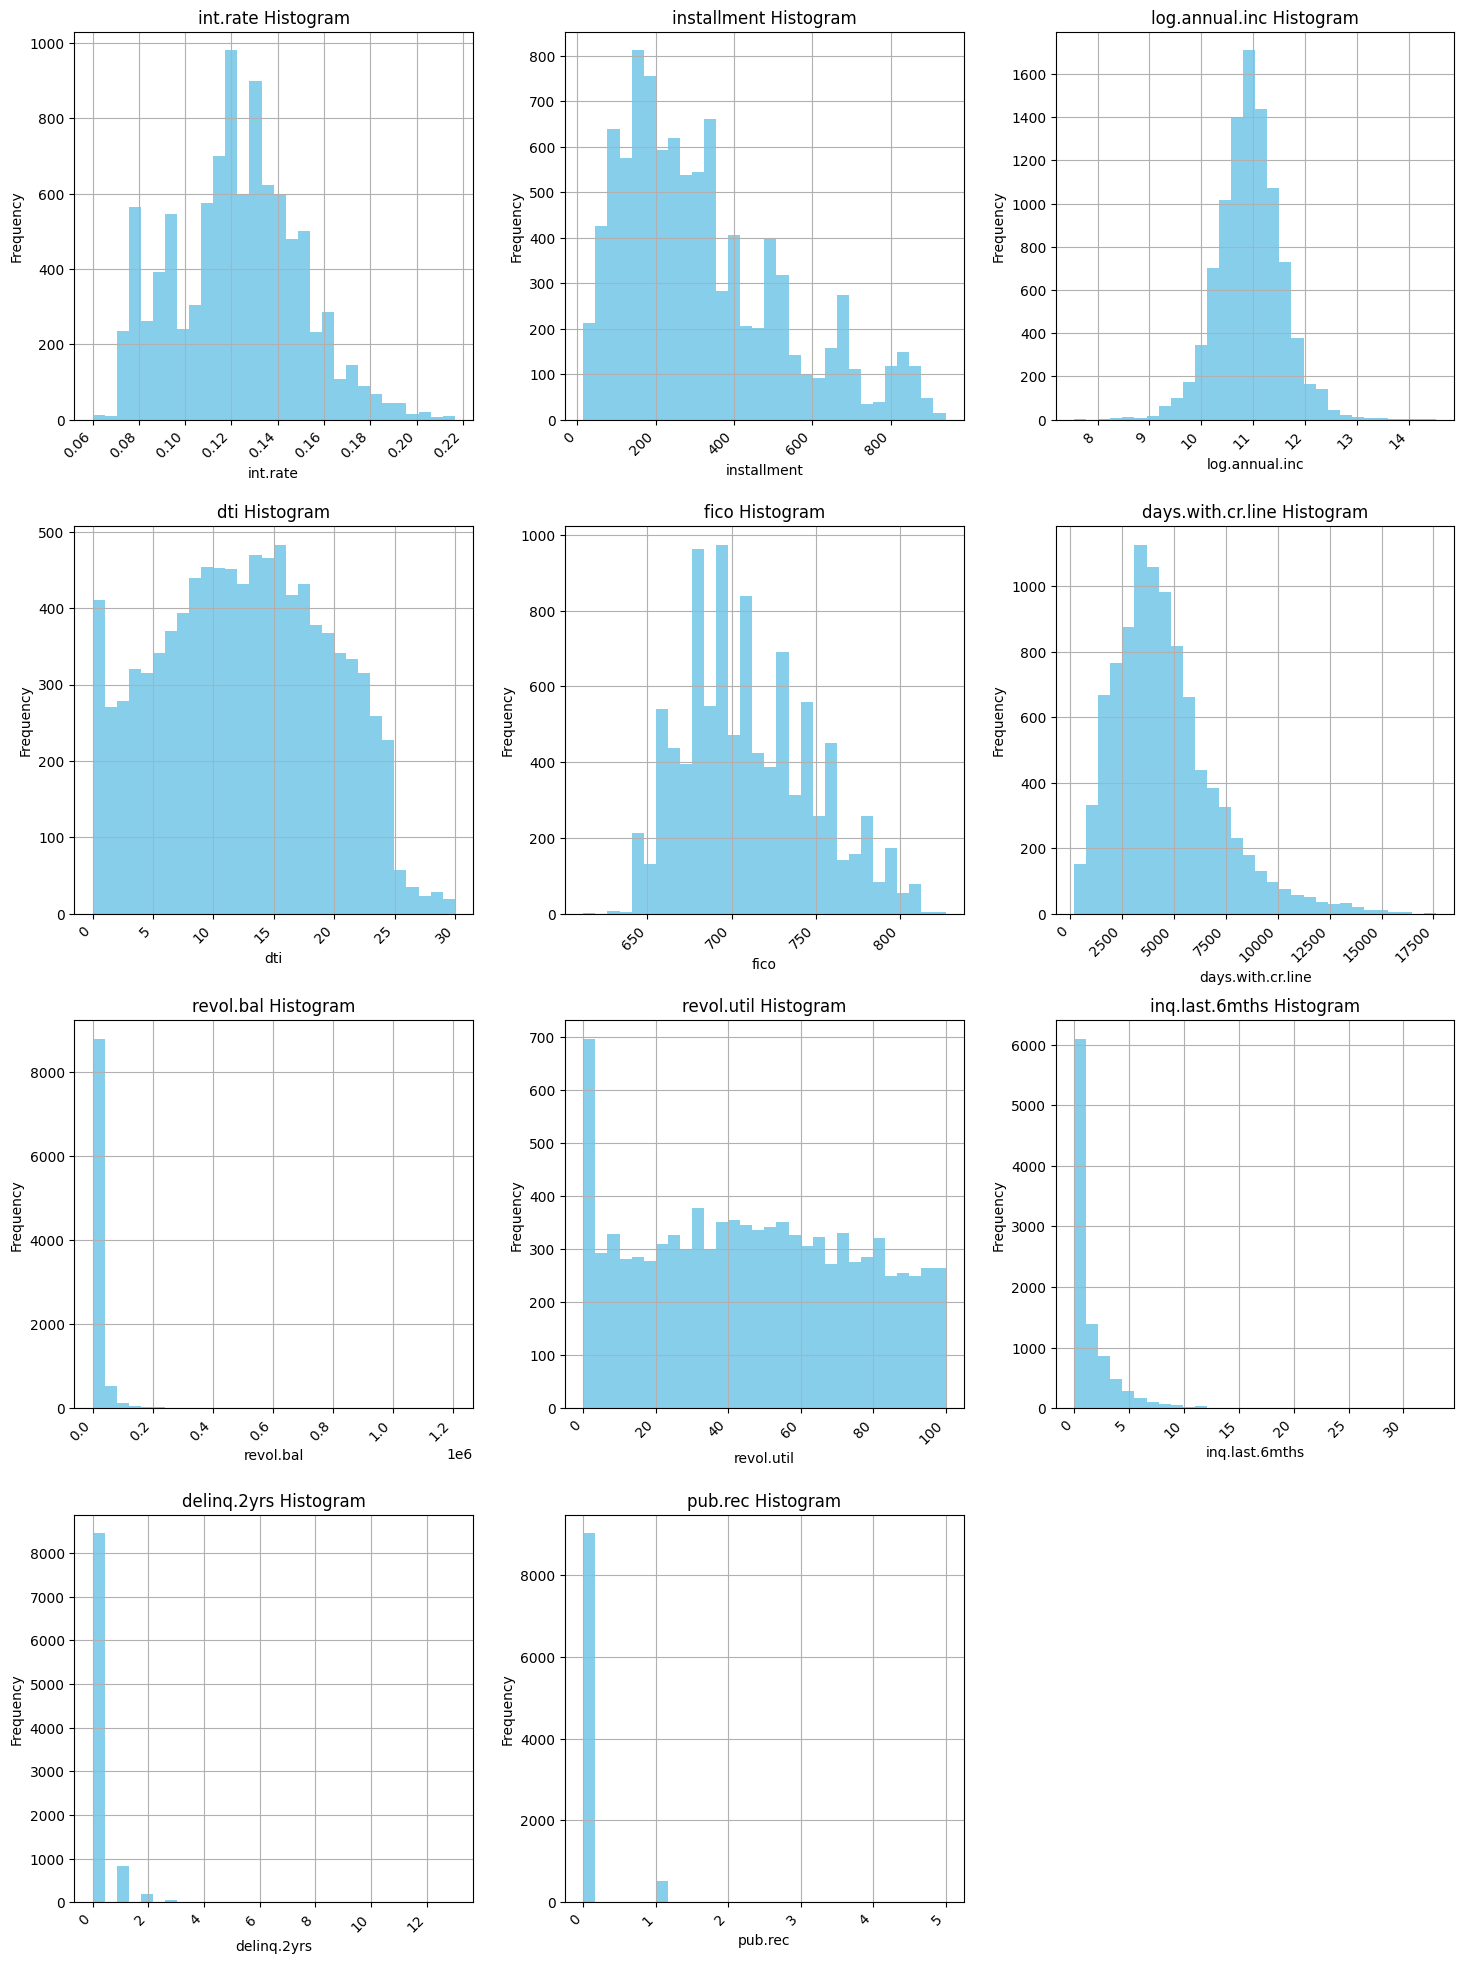

In [49]:
# Filter numerical features (int and float types)
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of rows and columns for subplots
num_features = len(numerical_features.columns)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Set figure size
plt.figure(figsize=(15, 5 * num_rows))

# Iterate over each numerical feature
for i, column in enumerate(numerical_features.columns, start=1):
    # Create subplot for each feature
    plt.subplot(num_rows, num_cols, i)
    
    # Plot histogram
    df[column].hist(color='skyblue', bins=30)
    
    # Add title and labels
    plt.title(f'{column} Histogram', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    
    # Rotate x-axis labels if necessary
    plt.xticks(rotation=45, ha='right')
    
# Adjust layout
plt.tight_layout(pad=2.0, h_pad=1.0)

# Show plot
plt.show()

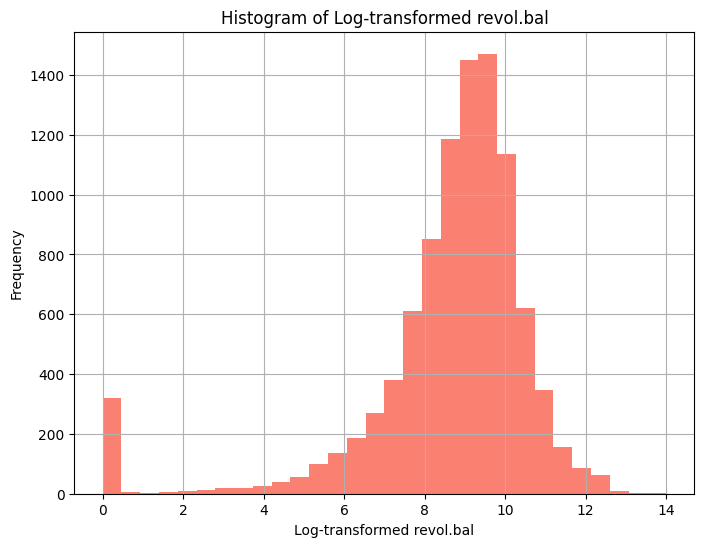

In [50]:
# Apply logarithm transformation to 'revol.bal'
df['revol.bal_log'] = np.log1p(df['revol.bal'])

# Plot histogram of the transformed data
plt.figure(figsize=(8, 6))
df['revol.bal_log'].hist(color='salmon', bins=30)
plt.title('Histogram of Log-transformed revol.bal')
plt.xlabel('Log-transformed revol.bal')
plt.ylabel('Frequency')
plt.show()

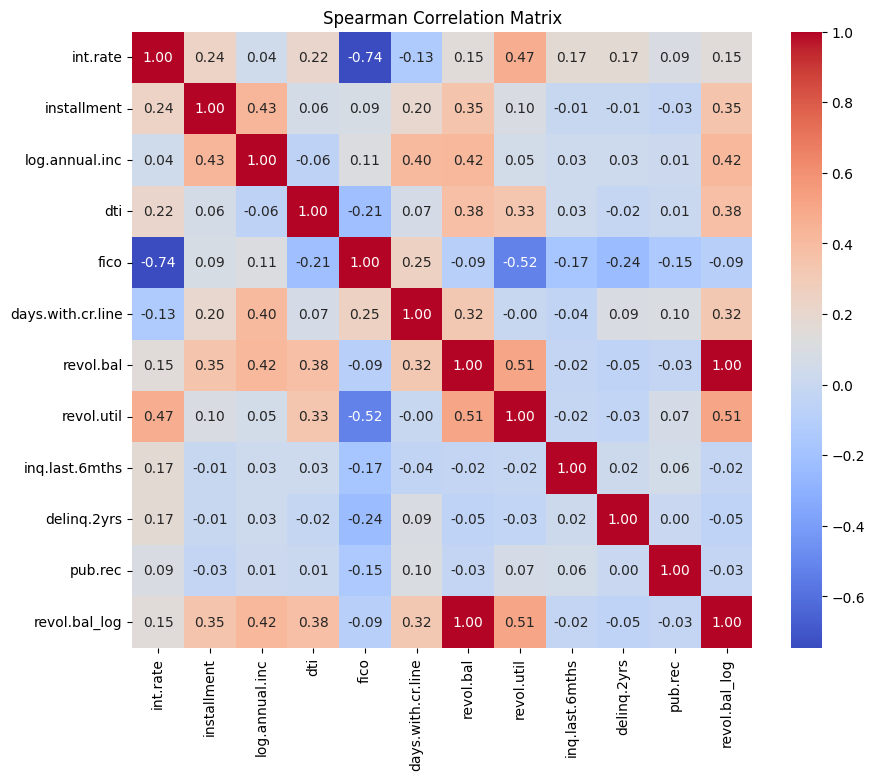

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numerical features (int and float types)
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Calculate Spearman correlation matrix
spearman_corr_matrix = numerical_features.corr(method='spearman')

# Set figure size
plt.figure(figsize=(10, 8))

# Plot heatmap
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Spearman Correlation Matrix')

# Show plot
plt.show()

In [52]:
from scipy.stats import spearmanr

# Run Spearman correlation test
spearman_corr_test_results = {}

# Iterate over each pair of numerical features
for feature1 in numerical_features.columns:
    for feature2 in numerical_features.columns:
        if feature1 != feature2:  # Exclude correlations between a feature and itself
            # Run Spearman correlation test
            corr, p_value = spearmanr(numerical_features[feature1], numerical_features[feature2])
            spearman_corr_test_results[(feature1, feature2)] = (corr, p_value)

# Display Spearman correlation test results
print("Spearman Correlation Test Results:")
for (feature1, feature2), (corr, p_value) in spearman_corr_test_results.items():
    if abs(corr) > 0.5 and p_value < 0.05:  # Filter higher correlations
        print(f"{feature1} - {feature2}: Correlation = {corr:.3f}, p-value = {p_value:.3f}")

Spearman Correlation Test Results:
int.rate - fico: Correlation = -0.745, p-value = 0.000
fico - int.rate: Correlation = -0.745, p-value = 0.000
fico - revol.util: Correlation = -0.520, p-value = 0.000
revol.bal - revol.util: Correlation = 0.515, p-value = 0.000
revol.bal - revol.bal_log: Correlation = 1.000, p-value = 0.000
revol.util - fico: Correlation = -0.520, p-value = 0.000
revol.util - revol.bal: Correlation = 0.515, p-value = 0.000
revol.util - revol.bal_log: Correlation = 0.515, p-value = 0.000
revol.bal_log - revol.bal: Correlation = 1.000, p-value = 0.000
revol.bal_log - revol.util: Correlation = 0.515, p-value = 0.000


In [53]:
# Perform one-hot encoding on 'purpose'
one_hot_encoded = pd.get_dummies(df['purpose'], prefix='purpose')

# Concatenate one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the 'purpose' column from the DataFrame
df.drop('purpose', axis=1, inplace=True)

# Display the head of the DataFrame as a styled table
df_head_styled = df.head().style
df_head_styled

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,inq_bin,delinq_bin,pubrec_bin,revol.bal_log,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,True,0.118900,829.100000,11.350407,19.480000,737,5639.958333,28854,52.100000,0,0,0,False,bin1,bin1,bin1,10.270039,False,False,True,False,False,False,False
1,True,0.107100,228.220000,11.082143,14.290000,707,2760.000000,33623,76.700000,0,0,0,False,bin1,bin1,bin1,10.422995,False,True,False,False,False,False,False
2,True,0.135700,366.860000,10.373491,11.630000,682,4710.000000,3511,25.600000,1,0,0,False,bin2,bin1,bin1,8.163941,False,False,True,False,False,False,False
3,True,0.100800,162.340000,11.350407,8.100000,712,2699.958333,33667,73.200000,1,0,0,False,bin2,bin1,bin1,10.424303,False,False,True,False,False,False,False
4,True,0.142600,102.920000,11.299732,14.970000,667,4066.000000,4740,39.500000,0,1,0,False,bin1,bin2,bin1,8.464003,False,True,False,False,False,False,False


In [54]:
# List of features to drop
features_to_drop = ['revol.bal', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

# Drop the specified features from the DataFrame
df.drop(features_to_drop, axis=1, inplace=True)

# Display the head of the DataFrame as a styled table
df_head_styled = df.head().style
df_head_styled

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,not.fully.paid,inq_bin,delinq_bin,pubrec_bin,revol.bal_log,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,True,0.118900,829.100000,11.350407,19.480000,737,5639.958333,52.100000,False,bin1,bin1,bin1,10.270039,False,False,True,False,False,False,False
1,True,0.107100,228.220000,11.082143,14.290000,707,2760.000000,76.700000,False,bin1,bin1,bin1,10.422995,False,True,False,False,False,False,False
2,True,0.135700,366.860000,10.373491,11.630000,682,4710.000000,25.600000,False,bin2,bin1,bin1,8.163941,False,False,True,False,False,False,False
3,True,0.100800,162.340000,11.350407,8.100000,712,2699.958333,73.200000,False,bin2,bin1,bin1,10.424303,False,False,True,False,False,False,False
4,True,0.142600,102.920000,11.299732,14.970000,667,4066.000000,39.500000,False,bin1,bin2,bin1,8.464003,False,True,False,False,False,False,False


In [55]:
# List of binned categorical features to label encode
binned_categorical_features = ['inq_bin', 'delinq_bin', 'pubrec_bin']

# Updated feature names
updated_binned_categorical_features = ['inq.last.6mths_bin', 'delinq.2yrs_bin', 'pub.rec_bin']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each binned categorical feature
for feature, updated_feature_name in zip(binned_categorical_features, updated_binned_categorical_features):
    df[updated_feature_name] = label_encoder.fit_transform(df[feature])
    df.drop(feature, axis=1, inplace=True)  # Drop the original feature

# Display the head of the DataFrame as a styled table
df_head_styled = df.head().style
df_head_styled

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,not.fully.paid,revol.bal_log,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,inq.last.6mths_bin,delinq.2yrs_bin,pub.rec_bin
0,True,0.118900,829.100000,11.350407,19.480000,737,5639.958333,52.100000,False,10.270039,False,False,True,False,False,False,False,0,0,0
1,True,0.107100,228.220000,11.082143,14.290000,707,2760.000000,76.700000,False,10.422995,False,True,False,False,False,False,False,0,0,0
2,True,0.135700,366.860000,10.373491,11.630000,682,4710.000000,25.600000,False,8.163941,False,False,True,False,False,False,False,1,0,0
3,True,0.100800,162.340000,11.350407,8.100000,712,2699.958333,73.200000,False,10.424303,False,False,True,False,False,False,False,1,0,0
4,True,0.142600,102.920000,11.299732,14.970000,667,4066.000000,39.500000,False,8.464003,False,True,False,False,False,False,False,0,1,0


In [56]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop('not.fully.paid', axis=1)  # Features
y = df['not.fully.paid']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (7662, 19) (7662,)
Test set shape: (1916, 19) (1916,)


In [57]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select numerical features for normalization
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the numerical features
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform the numerical features in the test set using the scaler fitted on the training set
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Display the head of the normalized training and testing sets as styled tables
print("Normalized Training Set:")
display(X_train.head().style)
print("\nNormalized Testing Set:")
display(X_test.head().style)

Normalized Training Set:


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,revol.bal_log,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,inq.last.6mths_bin,delinq.2yrs_bin,pub.rec_bin
7317,True,0.868707,0.049122,-1.535031,-0.172101,-0.498260,0.268636,-0.608260,-1.633740,False,False,False,False,False,True,False,1,0,0
350,True,-1.431963,-0.391757,0.475451,-0.948919,0.811133,-0.566438,-0.208505,-0.099480,False,True,False,False,False,False,False,0,0,0
5206,True,-0.283480,-0.865503,0.385937,-0.837116,0.156437,-0.302347,0.883928,0.365895,False,False,True,False,False,False,False,1,0,0
2673,True,-1.083713,1.015832,0.203709,-0.616412,0.549255,-0.194484,1.335376,0.933546,True,False,False,False,False,False,False,0,0,0
3528,True,-0.364985,-0.024503,-0.393163,0.935774,1.203951,0.992200,-1.438785,-1.251671,False,False,False,False,False,True,False,1,0,0



Normalized Testing Set:


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,revol.bal_log,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,inq.last.6mths_bin,delinq.2yrs_bin,pub.rec_bin
8558,False,1.187319,0.659518,-0.551198,0.279471,-1.414835,-0.302347,1.231991,0.213059,False,False,True,False,False,False,False,2,0,0
4629,True,-0.153813,1.046473,0.362771,-0.247604,0.549255,-0.386254,-0.191274,0.495554,False,False,True,False,False,False,False,2,0,0
1383,True,-0.290890,-0.578554,-0.956987,0.164763,-0.498260,-0.997593,1.356053,0.441664,False,True,False,False,False,False,False,0,0,0
8142,False,1.561502,-1.021902,0.111011,2.259996,-1.022017,0.764486,-0.711645,0.174401,True,False,False,False,False,False,False,2,1,0
1768,True,-0.013031,-0.761673,0.315524,-1.249483,-0.236381,0.189107,-1.352631,-1.101934,True,False,False,False,False,False,False,1,1,0


In [58]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

# Initialize the models
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42)

# Train the models
rf_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)
logistic_predictions = logistic_regression.predict(X_test)

# Calculate ROC AUC score for each model
rf_roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
xgb_roc_auc = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])
logistic_roc_auc = roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:, 1])

# Evaluate model performance
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Classifier ROC AUC Score:", rf_roc_auc)
print("-----------------------------")
print("\nXGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))
print("XGBoost Classifier ROC AUC Score:", xgb_roc_auc)
print("-----------------------------")
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Classification Report:")
print(classification_report(y_test, logistic_predictions))
print("Logistic Regression ROC AUC Score:", logistic_roc_auc)

Random Forest Classifier:
Accuracy: 0.8402922755741128
Classification Report:
              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1611
        True       0.46      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.65      0.51      0.48      1916
weighted avg       0.78      0.84      0.77      1916

Random Forest Classifier ROC AUC Score: 0.67807695047369
-----------------------------

XGBoost Classifier:
Accuracy: 0.8298538622129437
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.97      0.91      1611
        True       0.37      0.10      0.16       305

    accuracy                           0.83      1916
   macro avg       0.61      0.53      0.53      1916
weighted avg       0.77      0.83      0.79      1916

XGBoost Classifier ROC AUC Score: 0.6356198675092347
-----------------------------

Logistic Regression:
Acc

In [59]:
df.columns


Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.util', 'not.fully.paid',
       'revol.bal_log', 'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business', 'inq.last.6mths_bin', 'delinq.2yrs_bin',
       'pub.rec_bin'],
      dtype='object')

Accuracy: 0.7463465553235908

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.84      0.85      1611
        True       0.24      0.27      0.25       305

    accuracy                           0.75      1916
   macro avg       0.55      0.55      0.55      1916
weighted avg       0.76      0.75      0.75      1916


Confusion Matrix:
[[1348  263]
 [ 223   82]]


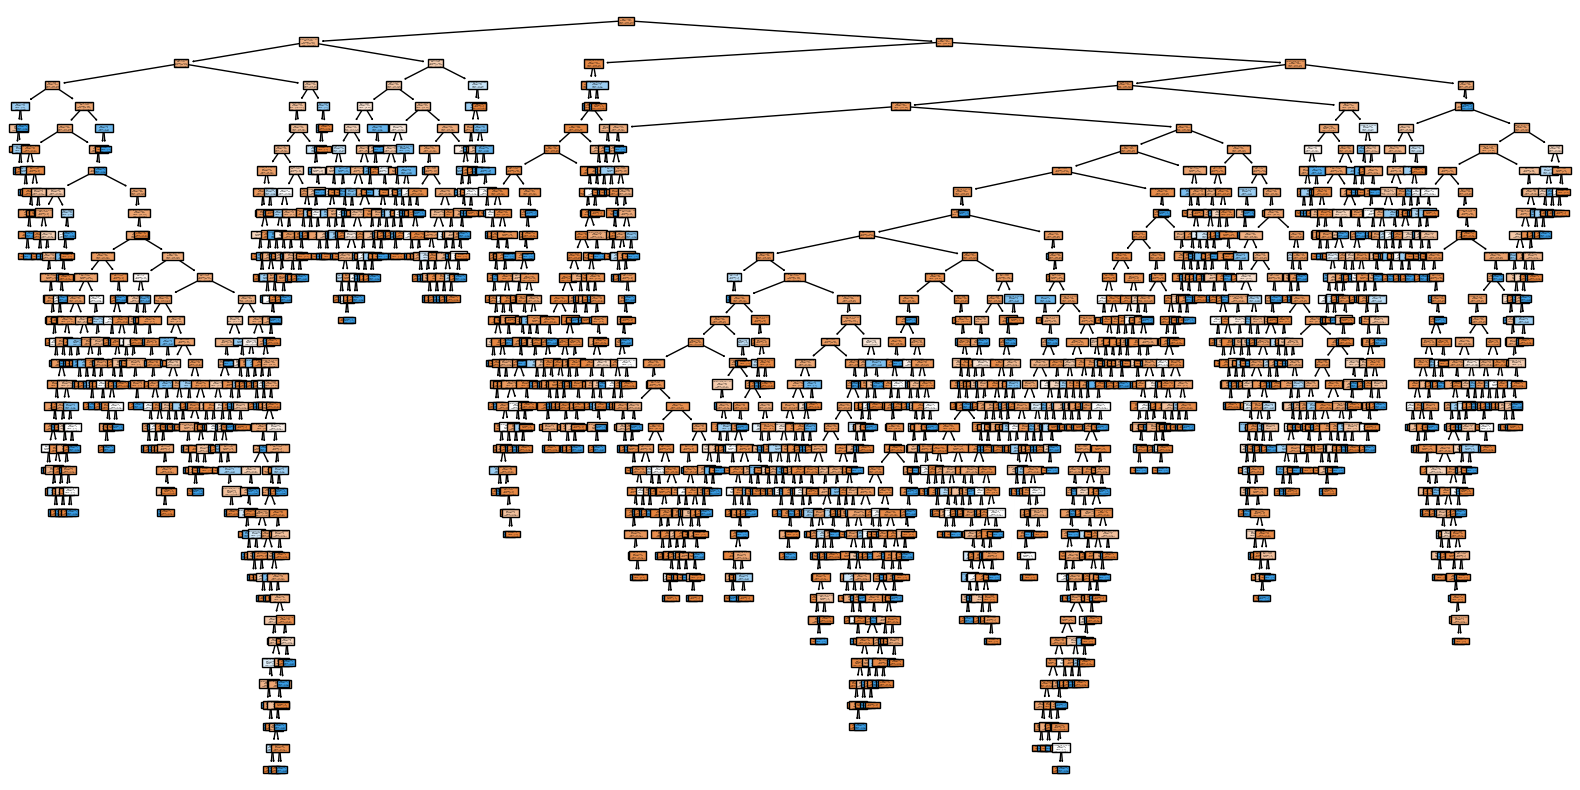

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Split dataset into features and target variable
X = df[['credit.policy','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal_log','revol.util','inq.last.6mths_bin','delinq.2yrs_bin','pub.rec_bin']]
y = df['not.fully.paid']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Training
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 4: Visualization and Interpretation
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Default', 'Default'], filled=True)
plt.show()


In [61]:
acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)

Accuracy:  0.746


In [62]:
print("Columns in X_train:", X_train.columns)

Columns in X_train: Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal_log', 'revol.util',
       'inq.last.6mths_bin', 'delinq.2yrs_bin', 'pub.rec_bin'],
      dtype='object')


In [63]:
# Define the features for a new loan applicant
new_applicant = {
    'credit.policy': 1,
    'int.rate': 0.1,
    'installment': 500,
    'log.annual.inc': 10.5,
    'dti': 0.3,
    'fico': 700,
    'days.with.cr.line': 2000
}


# Create a DataFrame from the new applicant's features
new_applicant_df = pd.DataFrame([new_applicant])

# Display the input for the new loan applicant
print("Input for the new loan applicant:")
print(new_applicant_df)

# Reorder columns to match the training data
new_applicant_df = new_applicant_df[X_train.columns]

# Predict loan repayment for the new applicant
prediction = clf.predict(new_applicant_df)

# Print the prediction
if prediction[0] == 0:
    print("Prediction: Fully Paid")
else:   
    print("Prediction: Not Fully Paid")

Input for the new loan applicant:
   credit.policy  int.rate  installment  log.annual.inc  dti  fico  \
0              1       0.1          500            10.5  0.3   700   

   days.with.cr.line  revol.bal_log  revol.util  inq.last.6mths_bin  \
0               2000           1000         0.5                   2   

   delinq.2yrs_bin  pub.rec_bin  
0                0            0  
Prediction: Not Fully Paid


In [64]:
import pickle
# save the iris classification model as a pickle file
model_pkl_file = "loan.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(clf, file)